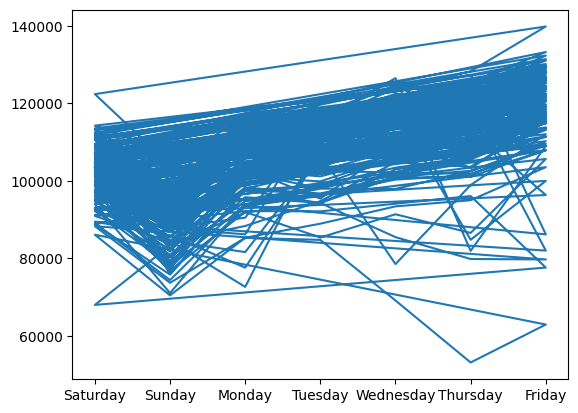

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("data/tunnel.csv")
df['Day'] = pd.to_datetime(df['Day'])
df['dayOfWeek'] = df['Day'].dt.day_name()

plt.plot(df['dayOfWeek'], df['NumVehicles'])

In [2]:
df

,Day,NumVehicles,dayOfWeek
0,2003-11-01,103536,Saturday
1,2003-11-02,92051,Sunday
2,2003-11-03,100795,Monday
3,2003-11-04,102352,Tuesday
4,2003-11-05,106569,Wednesday
...,...,...,...
742,2005-11-12,104646,Saturday
743,2005-11-13,94424,Sunday
744,2005-11-14,112165,Monday
745,2005-11-15,114296,Tuesday


In [3]:
df = pd.get_dummies(df, columns=['dayOfWeek'], prefix='', prefix_sep='', drop_first=True)
df

,Day,NumVehicles,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2003-11-01,103536,False,True,False,False,False,False
1,2003-11-02,92051,False,False,True,False,False,False
2,2003-11-03,100795,True,False,False,False,False,False
3,2003-11-04,102352,False,False,False,False,True,False
4,2003-11-05,106569,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
742,2005-11-12,104646,False,True,False,False,False,False
743,2005-11-13,94424,False,False,True,False,False,False
744,2005-11-14,112165,True,False,False,False,False,False
745,2005-11-15,114296,False,False,False,False,True,False


In [4]:
dummy_columns = df.columns.difference(['Day', 'NumVehicles'])
df[dummy_columns] = df[dummy_columns].astype(int)
df

,Day,NumVehicles,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2003-11-01,103536,0,1,0,0,0,0
1,2003-11-02,92051,0,0,1,0,0,0
2,2003-11-03,100795,1,0,0,0,0,0
3,2003-11-04,102352,0,0,0,0,1,0
4,2003-11-05,106569,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
742,2005-11-12,104646,0,1,0,0,0,0
743,2005-11-13,94424,0,0,1,0,0,0
744,2005-11-14,112165,1,0,0,0,0,0
745,2005-11-15,114296,0,0,0,0,1,0


In [5]:
X = df[dummy_columns]
y = df['NumVehicles']

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
print(model.coef_)

[-13403.83221654 -16273.48642215 -28868.95371187  -6469.94339623
 -10758.7387586   -7099.83221654]


In [21]:
print(float(model.intercept_))

118430.04716981134


In [7]:
days = list(dummy_columns)
weights = model.coef_

days_weights = {}

for k, v in zip(days, weights):
    days_weights[k] = int(v)

days_weights

{'Monday': -13403,
 'Saturday': -16273,
 'Sunday': -28868,
 'Thursday': -6469,
 'Tuesday': -10758,
 'Wednesday': -7099}